In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('NoOutliersDataset.csv', index_col= [0])

numerical = ["CO2 Emissions", "AFF", "Government Effectiveness", "Individuals using the Internet", "Life Expectancy", "Renewable Energy Consumption"]
categorical = ["Country", "Income Group", "Region"]
df

,Country,Income Group,Region,CO2 Emissions,AFF,Government Effectiveness,Individuals using the Internet,Life Expectancy,Renewable Energy Consumption
0,Afghanistan,Low income,South Asia,0.200151,22.042897,-1.453096,60.828447,64.486000,21.422701
1,Albania,Upper middle income,Europe & Central Asia,1.939732,18.440931,0.057240,65.400000,78.458000,38.266399
2,Algeria,Lower middle income,Middle East & North Africa,3.591657,11.840233,-0.527378,49.038468,76.693000,0.193300
3,Andorra,High income,Europe & Central Asia,5.973405,10.393144,1.943918,60.828447,72.210078,18.506001
4,Angola,Lower middle income,Sub-Saharan Africa,0.887380,8.607742,-1.045002,37.169226,60.782000,56.785500
...,...,...,...,...,...,...,...,...,...
188,"Venezuela, RB",Low income,Latin America & Caribbean,4.782755,10.393144,-1.584651,60.828447,72.128000,14.564700
189,Vietnam,Lower middle income,East Asia & Pacific,2.698806,14.681979,-0.001380,69.847929,75.317000,23.491800
190,"Yemen, Rep.",Low income,Middle East & North Africa,0.326682,5.000963,-2.230443,60.828447,66.096000,4.269000
191,Zambia,Lower middle income,Sub-Saharan Africa,0.446065,3.341147,-0.557072,37.169226,63.510000,85.104599


In [ ]:
#DESCRIPTIVE ANALYSIS

#df[["Income Group", "CO2 Emissions"]].groupby("Income Group").mean()  # average co2 emissions by income group
# df[["Region", "CO2 Emissions"]].groupby("Region").mean()  # average co2 emissions by region
df.groupby(["Region", "Income Group"])["CO2 Emissions"].mean()  #a clear ascending trend is seen: as countries go up in the income category, so do their co2 emissions

#df.describe()
#df.isna().sum()
#df.duplicated().sum()


In [ ]:
def skew_kurt(df, attribute):
#we use bias=False to calculate the sample skewness and kurtosis, not the population ones
    from scipy.stats import kurtosis
    from scipy.stats import skew
    kurtosis_value = kurtosis(df[attribute],fisher=False, bias= False)
    skewness_value = skew(df[attribute], bias= False)

    print("🟢🟢🟢🟢🟢 Skewness & Kurtosis 🟢🟢🟢🟢🟢")
    if kurtosis_value == 3:
        print("Distribution of " + str(attribute) + " seems to be mesokurtic, with a Kurtosis value of " + str(kurtosis_value))
    elif (kurtosis_value <3):
        print("Distribution of " + str(attribute) + " seems to be platykurtic, with a Kurtosis value of " + str(kurtosis_value))
    elif (kurtosis_value > 3):
        print("Distribution of " + str(attribute) + " seems to be leptokurtic, with a Kurtosis value of " + str(kurtosis_value))

    if skewness_value == 0:
        print("Distribution of " + str(attribute) + " seems to be symmetrical, with a Skewness value of " + str(skewness_value))
    elif skewness_value > 0:
        print("Distribution of " + str(attribute) + " seems to be asymmetrical to the right (positive skew), with a Skewness value of " + str(skewness_value))
    elif skewness_value < 0:
        print("Distribution of " + str(attribute) + " seems to be asymmetrical to the left (negative skew), with a Skewness value of " + str(skewness_value))


for attr in numerical:
    skew_kurt(df, attr)
    print("-------------------------------------------")

In [ ]:
#countplots of the categorical variables

for attr in ['Income Group', 'Region']:
    sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 5]})
    ax = sns.countplot(x = df[attr],order=df[attr].value_counts(ascending=False).index)
    abs_values = df[attr].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values);
    plt.show()




In [ ]:
#Multiple Density Estimate Plots

fig, ax = plt.subplots()

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 5]})

sns.kdeplot(df[df["Income Group"]=="Low income"]["CO2 Emissions"], shade=True, color="purple", label="Low Income", ax=ax)
sns.kdeplot(df[df["Income Group"]=="Lower middle income"]["CO2 Emissions"], shade=True, color="yellow", label="Lower middle income", ax=ax)
sns.kdeplot(df[df["Income Group"]=="Upper middle income"]["CO2 Emissions"], shade=True, color="red", label="Upper middle income", ax=ax)
sns.kdeplot(df[df["Income Group"]=="High income"]["CO2 Emissions"], shade=True, color="green", label="High income", ax=ax)
ax.legend()
ax.set_xlabel("CO2 Emissions")
ax.set_ylabel("Density")

fig.suptitle("CO2 Emissions vs. Income Group");

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 9))

sns.histplot(data=df, x="CO2 Emissions", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="AFF", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Government Effectiveness", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="Individuals using the Internet", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="Life Expectancy", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Renewable Energy Consumption", kde=True, color="teal", ax=axs[1, 2])

plt.show()

In [ ]:
#quick look at the joint distribution of a few pairs of columns
sns.pairplot(df[numerical], diag_kind='kde') 

In [ ]:
#correlations
fig,ax = plt.subplots(figsize = (15,10))
sns.heatmap(df.corr(),cmap = 'plasma', annot= True)

In [ ]:
#boxplots

fig, ax = plt.subplots(2, 1, figsize=(25, 20))
for var, subplot in zip(['Region', 'Income Group'], ax.flatten()):
    sns.boxplot(x=var, y='CO2 Emissions', data=df, ax=subplot)



In [ ]:
sns.boxplot(data = df)

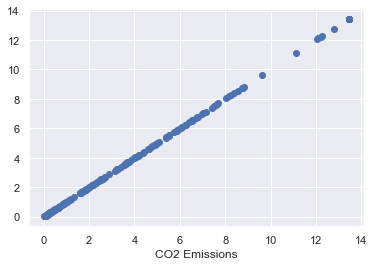

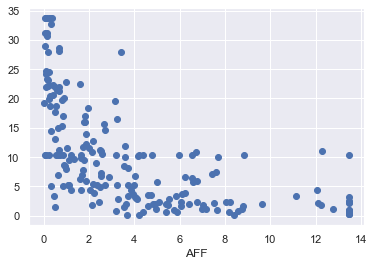

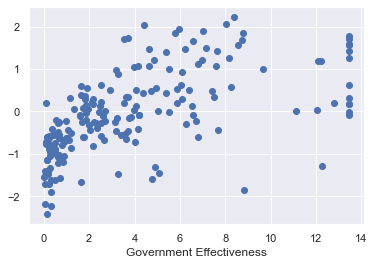

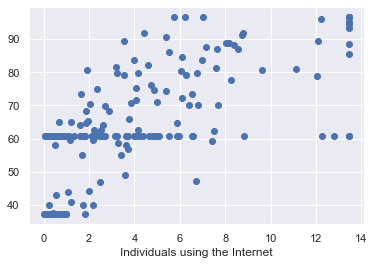

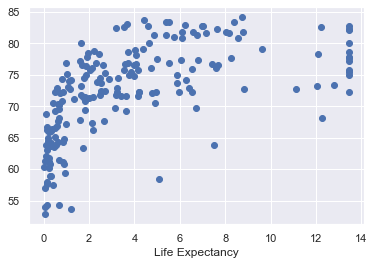

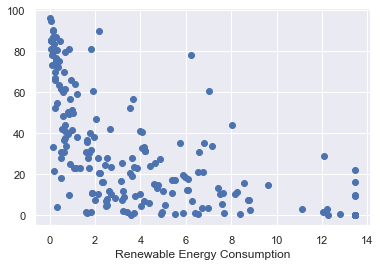

In [2]:
s = 0
sns.set()
for i in numerical:
    plt.scatter(df['CO2 Emissions'], df[i])
    plt.xlabel(i)
    plt.show()

<AxesSubplot:xlabel='Income Group', ylabel='CO2 Emissions'>

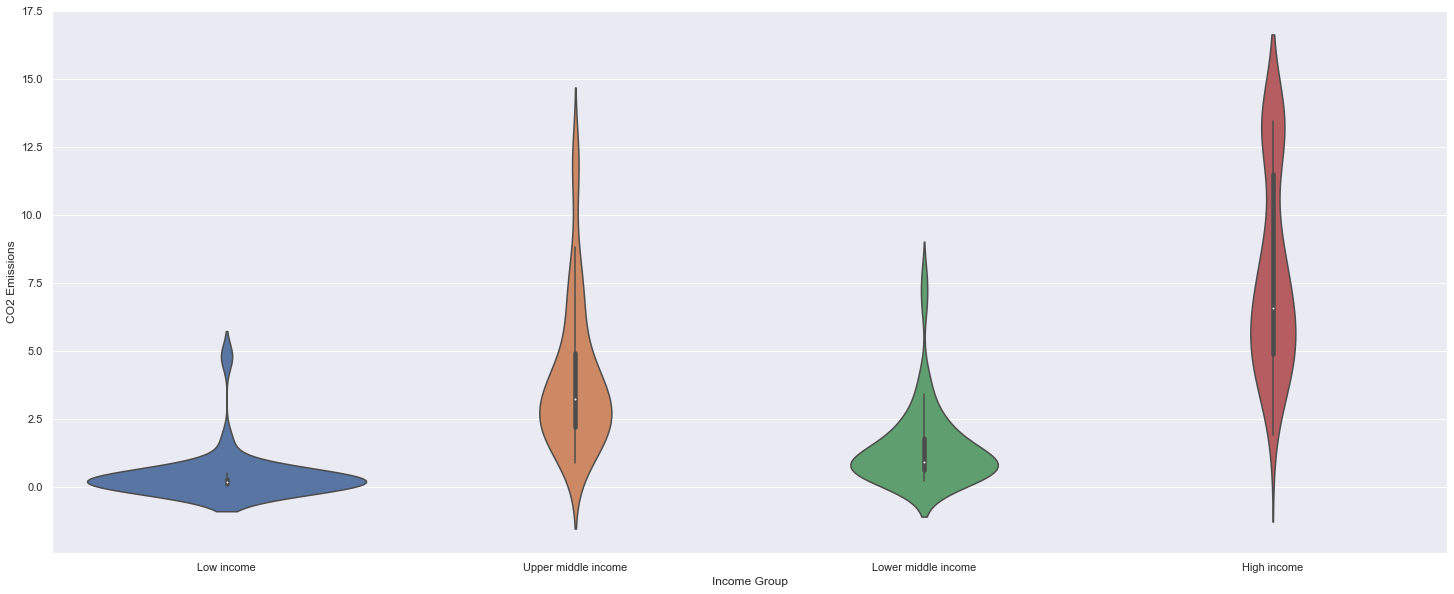

In [3]:
fig,ax = plt.subplots(figsize = (25,10))
sns.violinplot(x=df["Income Group"], y=df["CO2 Emissions"])